In [ ]:
import os
import glob
import cv2
import matplotlib
import tensorflow as tf
 
from keras.losses import SparseCategoricalCrossentropy
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Softmax
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.utils import shuffle
from keras.callbacks import ModelCheckpoint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def get_data(DIRECTORY, CATEGORIES):
    images = []
    labels = []
    for category in CATEGORIES:
        path = os.path.join(DIRECTORY, category)
        classes = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))
            img_array = cv2.resize(img_array, (32,32))
            images.append(img_array)
            labels.append(classes)
    return images, labels

In [ ]:
train_dir = '/content/drive/My Drive/data'
val_dir = '/content/drive/My Drive/data_kelas'
categories = ["without_mask", "with_mask"]

train_images, train_labels = get_data(train_dir, categories)
train_images, train_labels = shuffle(train_images, train_labels, random_state=0)
train_images = np.array(train_images) / 255.0
train_labels = np.array(train_labels)


val_images, val_labels = get_data(val_dir, categories)
val_images = np.array(val_images)/255.0
val_labels = np.array(val_labels)

In [ ]:
train_images = train_images.reshape((train_images.shape[0], 32, 32,3)).astype('float32')
val_images = val_images.reshape((val_images.shape[0], 32, 32,3)).astype('float32')

In [ ]:
len(train_images)

7553

In [ ]:
model = Sequential([
    Conv2D(filters = 32, kernel_size = (3, 3),activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(filters = 128, kernel_size = (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),

    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
model2 = Sequential([
    Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(filters = 128, kernel_size = (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),

    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

model2.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
filepath1 = '/content/drive/My Drive/model_com_vis/weights.model1.hdf5'
checkpoint1 = ModelCheckpoint(filepath1, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list1 = [checkpoint1]

filepath2 = '/content/drive/My Drive/model_com_vis/weights.model2.hdf5'
checkpoint2 = ModelCheckpoint(filepath2, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list2 = [checkpoint2]

In [ ]:
history = model.fit(train_images, train_labels, 
                    validation_data=(val_images, val_labels),steps_per_epoch=len(train_images)//32,
                    epochs=30, batch_size=32,callbacks=callbacks_list1)

Epoch 1/30
236/236 [==============================] - 37s 51ms/step - loss: 0.6713 - accuracy: 0.6725 - val_loss: 0.4386 - val_accuracy: 0.8261

Epoch 00001: val_accuracy improved from -inf to 0.82609, saving model to /content/drive/My Drive/model_com_vis/weights.model1.hdf5
Epoch 2/30
236/236 [==============================] - 12s 50ms/step - loss: 0.2776 - accuracy: 0.8898 - val_loss: 0.4494 - val_accuracy: 0.8696

Epoch 00002: val_accuracy improved from 0.82609 to 0.86957, saving model to /content/drive/My Drive/model_com_vis/weights.model1.hdf5
Epoch 3/30
236/236 [==============================] - 12s 50ms/step - loss: 0.1986 - accuracy: 0.9252 - val_loss: 0.3364 - val_accuracy: 0.8261

Epoch 00003: val_accuracy did not improve from 0.86957
Epoch 4/30
236/236 [==============================] - 12s 50ms/step - loss: 0.2027 - accuracy: 0.9198 - val_loss: 0.2389 - val_accuracy: 0.9130

Epoch 00004: val_accuracy improved from 0.86957 to 0.91304, saving model to /content/drive/My Drive/

In [ ]:
history2 = model2.fit(train_images, train_labels, 
                    validation_data=(val_images, val_labels),steps_per_epoch=len(train_images)//32,
                    epochs=30, batch_size=32,callbacks=callbacks_list2)

Epoch 1/30
236/236 [==============================] - 12s 43ms/step - loss: 0.7609 - accuracy: 0.6511 - val_loss: 0.4671 - val_accuracy: 0.8276

Epoch 00001: val_accuracy did not improve from 0.93103
Epoch 2/30
236/236 [==============================] - 10s 41ms/step - loss: 0.2531 - accuracy: 0.9047 - val_loss: 0.4840 - val_accuracy: 0.8276

Epoch 00002: val_accuracy did not improve from 0.93103
Epoch 3/30
236/236 [==============================] - 10s 42ms/step - loss: 0.1846 - accuracy: 0.9335 - val_loss: 0.4261 - val_accuracy: 0.8276

Epoch 00003: val_accuracy did not improve from 0.93103
Epoch 4/30
236/236 [==============================] - 10s 42ms/step - loss: 0.1720 - accuracy: 0.9355 - val_loss: 0.4125 - val_accuracy: 0.8621

Epoch 00004: val_accuracy did not improve from 0.93103
Epoch 5/30
236/236 [==============================] - 10s 42ms/step - loss: 0.1383 - accuracy: 0.9496 - val_loss: 0.6025 - val_accuracy: 0.8276

Epoch 00005: val_accuracy did not improve from 0.93103


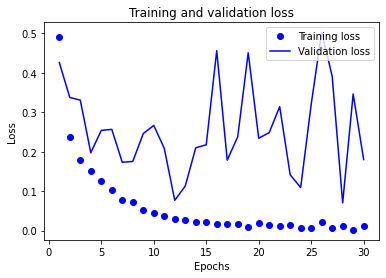

In [ ]:
import matplotlib.pyplot as plt

history_dict = history2.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

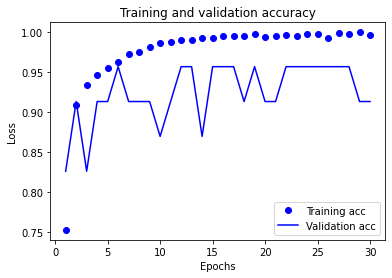

In [ ]:
plt.clf()

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
model_best = tf.keras.models.load_model('/content/drive/My Drive/model_com_vis/weights.model2.hdf5')
 
model_best.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = int(true_label[i]), img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(categories[predicted_label],
                                100*np.max(predictions_array),
                                categories[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = int(true_label[i])
  plt.grid(False)
  plt.xticks(range(2))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
val_dir = '/content/drive/My Drive/data_kelas'
#yang diatas versi belum banyak foto, sekarang yang sudah banyak
categories = ["without_mask", "with_mask"]
val_images, val_labels = get_data(val_dir, categories)
val_images = np.array(val_images)/255.0
val_labels = np.array(val_labels)

In [ ]:
val_images = val_images.reshape((val_images.shape[0], 32, 32,3)).astype('float32')

In [ ]:
len(val_images)

28

In [ ]:
predictions= model_best.predict(val_images)

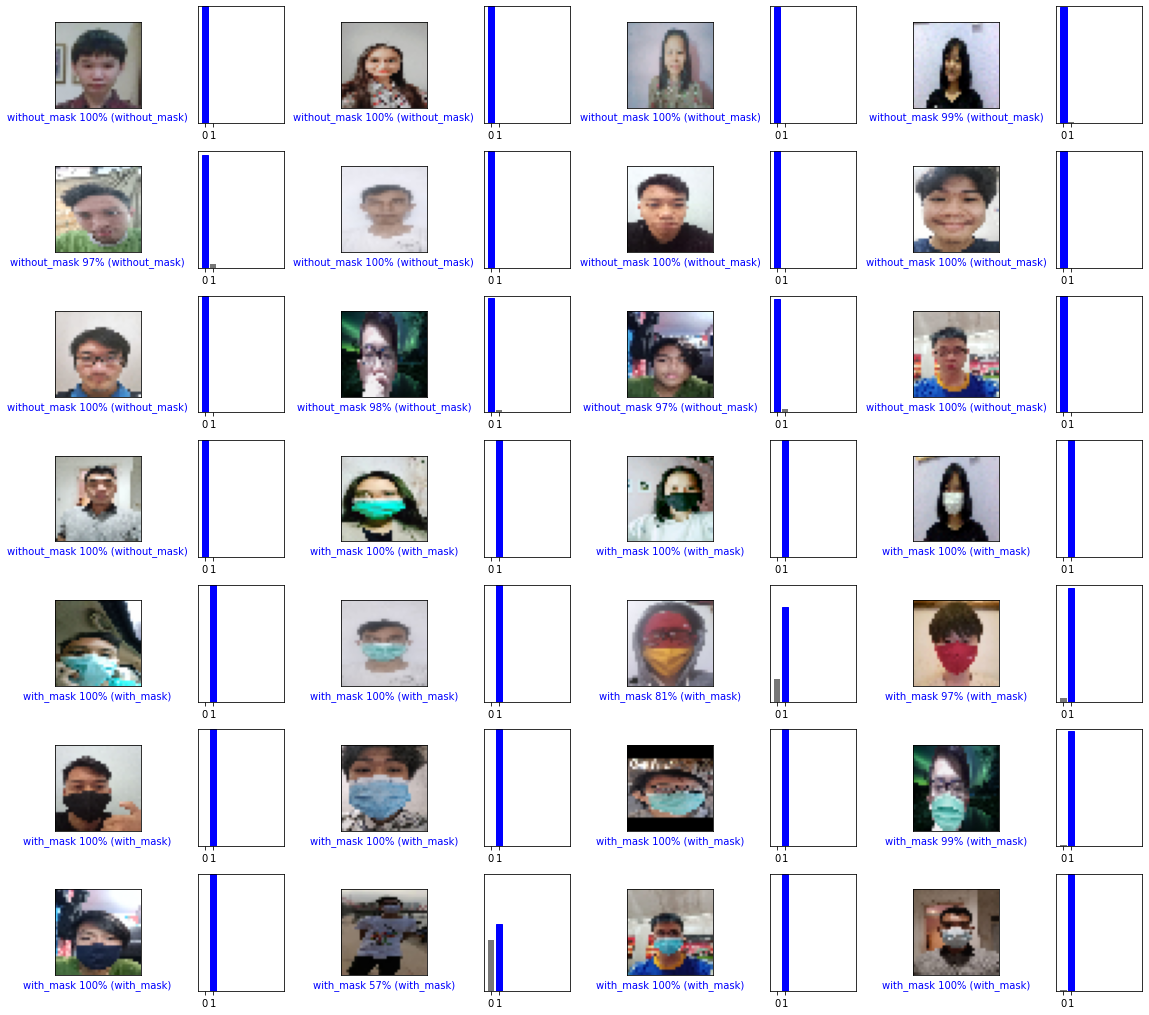

In [ ]:
num_rows = 10
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(len(val_images)):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], val_labels, val_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], val_labels)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

predict_result =[]
for i in range(len(val_images)):
  predict_result.append(np.argmax(predictions[i]))
matrix = confusion_matrix(val_labels,predict_result)
matrix

array([[13,  0],
       [ 0, 15]])

## realtime


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
 
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);
 
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
 
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();
 
      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
 
      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);
 
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


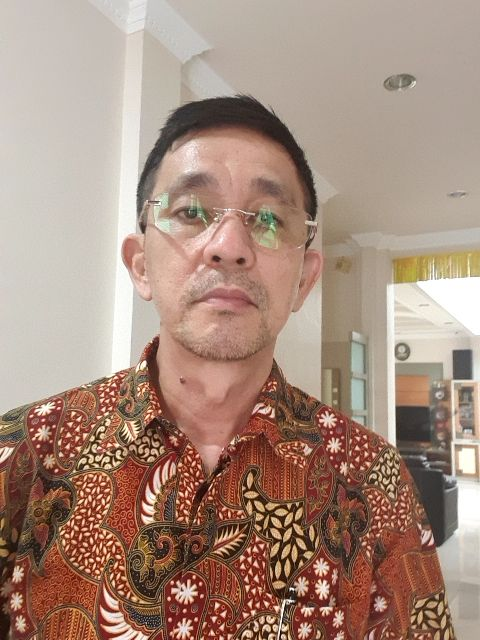

without mask


In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
  img = cv2.imread(filename)
  img = cv2.resize(img,(32,32))
  img = np.reshape(img,[1,32, 32,3])
 
  classes = model_best.predict(img)
 
  if np.argmax(classes) == 0:
    
    print("without mask")
  else :
    
    print("with mask")
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))